<a href="https://colab.research.google.com/github/flexinJ/flexinBot/blob/main/flexinBotHk50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading required packages
!pip install yfinance
!pip install numpy
!pip install pandas
!pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 699 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import of the necessary modules
import numpy as np
import pandas as pd
import math
import yfinance as yf
from hurst import compute_Hc
import matplotlib.pyplot as plt
from IPython.display import clear_output 
from time import sleep

In [3]:
######################## Welcome ##########################
# Based in fibo sequence.
# Flexin (@moraisjota) make this ~ enjoy xD
######################## FlexinBot ########################

In [4]:
class tradingSystem():
  def flexin(symbol, dateRange, timeFrame):
    ######################## DataFrame ########################
    # Finance database import
    data = yf.Ticker(symbol).history(period=dateRange, interval=timeFrame)
    data.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    ######################## Indicators ########################
    # Moving average
    # 8, 13 and 55 periods (EMA, Adj close)
    data['mA8'] = data['Close'].ewm(span=8, min_periods=8).mean()
    data['mA13'] = data['Close'].ewm(span=13, min_periods=13).mean()
    data['mA55'] = data['Close'].ewm(span=55, min_periods=55).mean()
    # Ichimoku Cloud
    # 8, 21 and 55 periods
    data['tenkanSen'] = (data['High'].rolling(window=8).max()+data['High'].rolling(window=8).min())/2
    data['kijunSen'] = (data['High'].rolling(window=21).max()+data['Low'].rolling(window=21).min())/2
    data['senkouA'] = ((data['tenkanSen']+data['kijunSen'])/2).shift(21)
    data['senkouB'] = ((data['High'].rolling(window=55).max()+data['Low'].rolling(window=55).min())/2).shift(21)
    # Relative Strength Index (RSI)
    # 21 periods (close) 
    diff = data['Close'].diff()
    diffUp = diff.clip(lower=0)
    diffDown = -1*diff.clip(upper=0)
    averageGain = diffUp.ewm(span=21, min_periods=21).mean()
    averageLoss = abs(diffDown.ewm(span=21, min_periods=21).mean())
    relativeStrength = averageGain / averageLoss
    data['RSI'] = RSI = 100.0 - (100.0 / (1.0 + relativeStrength))
    # Calculate series of Log return of close prices 
    data['logCloseReturn'] = np.log(data['Close']/data['Close'].shift(1))
    ######################## Hurst exponent filter ########################
    '''
    H = 0.5 — Brownian motion
    0.5 < H < 1.0 — persistent behavior
    0 < H < 0.5 — anti-persistent behavior
    '''
    # Funcion def calculate Hurst Exponent (available on github on https://github.com/Mottl/hurst)
    H = lambda x: compute_Hc(x)[0]
    data['Hurst'] = data['logCloseReturn'].rolling(window=100).apply(H)
    # Dealing with NaN data
    data.dropna(inplace=True, axis=0)
    ######################## Current values ########################
    # Capturing all required current values of variables
    currentValues = dict()
    # Close price
    currentValues['Close price'] = currentClosePrice = data['Close'][-1]
    # Open price
    currentValues['Open price'] = currentOpenPrice = data['Open'][-1]
    # Moving average
    currentValues['Ma8'] = currentMa8 = data['mA8'][-1]
    currentValues['Ma13'] = currentMa13 = data['mA13'][-1]
    currentValues['Ma55'] = currentMa55 = data['mA55'][-1]
    # Ichimoku Cloud
    currentValues['Senkou A'] = currentSenkouA = data['senkouA'][-1]
    currentValues['Senkou B'] = currentSenkouB = data['senkouB'][-1]
    # RSI
    currentValues['Rsi'] = currentRsi = data['RSI'][-1]
    # Hurst exponent
    currentValues['Hurst'] = currentHurst = data['Hurst'][-1]
    print('-----------------------------------------------------------------')
    # Plot hurst graph
    data['Hurst'].tail(5).plot(figsize=(8, 5), color='deepskyblue', linestyle='dashdot').grid(True)
    plt.title('Hurst Exponent', fontsize=20)
    plt.xlabel('Time', size=16,  color = 'r')
    plt.ylabel('Hurst value', size=16, color = 'deepskyblue') 
    plt.show()
    # View current data
    print('######################## Flexin strategy ########################')
    currentValues = dict(sorted(currentValues.items(), key=lambda item: item[1]))
    for k, v in currentValues.items():
      currentValues = sorted(currentValues)
      print(f'{k}| {v.round(4)}')
    print('######################## Flexin signals! ########################')
    ######################## Flexin strategy ########################
    # Buy
    if currentClosePrice > currentMa8 and currentOpenPrice > currentMa8 and currentMa8 > currentMa13 and currentMa13 > currentMa55 and currentMa13 > currentSenkouA and currentSenkouA > currentSenkouB and currentRsi > 50 and 1 > currentHurst > 0.5:
      buy = True
      print('Buy:', buy)
    else:
      print('Buy: False')
    # Sell
    if currentClosePrice < currentMa8 and currentOpenPrice < currentMa8 and currentMa8 < currentMa13 and currentMa13 < currentMa55 and currentMa13 < currentSenkouA and currentSenkouA < currentSenkouB and currentRsi < 50 and 1 > currentHurst > 0.5:
      sell = True
      print('Sell: ', sell)
    else:
      print('Sell: False')
    print('-----------------------------------------------------------------')

-----------------------------------------------------------------


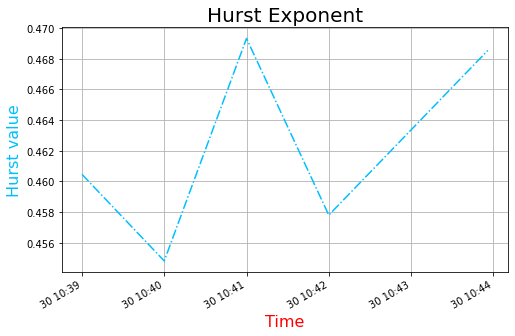

######################## Flexin strategy ########################
Hurst| 0.4685
Rsi| 47.117
Senkou A| 18153.5845
Ma55| 18196.9314
Close price| 18203.2598
Open price| 18203.2598
Ma8| 18209.8574
Ma13| 18212.298
Senkou B| 18214.2656
######################## Flexin signals! ########################
Buy: False
Sell: False
-----------------------------------------------------------------


In [ ]:
# 'EURUSD=X', '1mo', '15m'
# '^HSI', '5d', '1m'
while True:
  tradingSystem.flexin('^HSI', '7d', '1m')
  sleep(60)
  clear_output()